In [6]:
#Name: Karan Rakesh Singh
#Email_Id: singh.kara@husky.neu.edu

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pylab as pl
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score

In [237]:
#DataFrame out of the CSV Data
file = pd.read_csv('./screening_exercise_orders_v201810.csv')
#Assembled Series after grouping by customer_id and gender and getting the most recent order date
assembled_series = file.groupby(['customer_id','gender'])['date'].max()
#Converting the series returned after grouping and aggregation to a data frame
assembled_data_frame = assembled_series.to_frame().reset_index()
#Defining the columns of the new assembled data fram
assembled_data_frame.columns = ['customer_id','gender','most_recent_order_date']
#Assembling a series with the number of orders placed by each customer
assembled_count_series = file['customer_id'].value_counts()
#Converting the series to a dataframe
assembled_order_count_dataframe = assembled_count_series.to_frame().reset_index()
#Defining columns of the count dataframe
assembled_order_count_dataframe.columns = ['customer_id','order_count']
#Joining the two individual data frames to form the final data frame and thus completing Task A
final_dataframe = assembled_data_frame.set_index('customer_id').join(assembled_order_count_dataframe.set_index('customer_id'))
#Sorting the final dataframe by customer_id ascending and displaying the first 10 rows.
print(final_dataframe.sort_values(by='customer_id', ascending=True)[:10])

             gender most_recent_order_date  order_count
customer_id                                            
1000              0    2017-01-01 00:11:31            1
1001              0    2017-01-01 00:29:56            1
1002              1    2017-02-19 21:35:31            3
1003              1    2017-04-26 02:37:20            4
1004              0    2017-01-01 03:11:54            1
1005              1    2017-12-16 01:39:27            2
1006              1    2017-05-09 15:27:20            3
1007              0    2017-01-01 15:59:50            1
1008              0    2017-12-17 05:47:48            3
1009              1    2017-01-01 19:27:17            1


Populating the interactive namespace from numpy and matplotlib
Week number of the year (Monday as the first day of the week) as a decimal number. All days in a new year preceding the first Monday are considered to be in week 0.


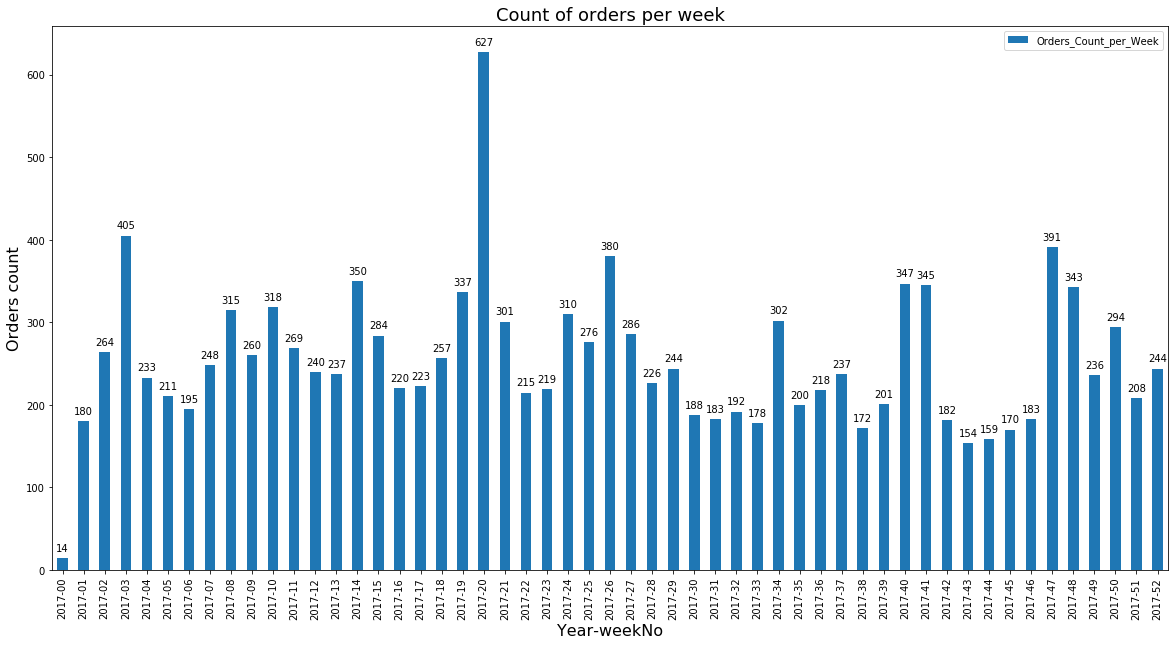

In [239]:
#resizing image size
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

print("Week number of the year (Monday as the first day of the week) as a decimal number. All days in a new year preceding the first Monday are considered to be in week 0.")
#Converting the date to datetime of the initial data frame
file['date'] = pd.to_datetime(file['date'])
#Transforming date to Year Week Number with the assumption that Week number of the year 
#(Monday as the first day of the week) as a decimal number. 
#All days in a new year preceding the first Monday are considered to be in week 0.
file['Year_WeekNo'] = file.date.dt.strftime('%Y-%W')
#grouping by Year week number and counting the orders to compute the number of orders per week
Count_orders_per_week = file.groupby(['Year_WeekNo'])['value'].count()
#Converting the series to dataframe
Count_orders_per_week_df = Count_orders_per_week.to_frame().reset_index()
#Defining columns for the dataframe with Year Week No and number of orders that week
Count_orders_per_week_df.columns = ['Year_WeekNo','Orders_Count_per_Week']


#Plotting a bar graph for orders per week for a store and thus completing Task B
lx = Count_orders_per_week_df.plot(kind='bar',x='Year_WeekNo',y='Orders_Count_per_Week')
#Annotating the bars of the graph with values 
for p in lx.patches: lx.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Count of orders per week',fontsize=18)

plt.ylabel('Orders count',fontsize=16)
plt.xlabel('Year-weekNo',fontsize=16)
plt.show()

In [257]:

#computing mean order value for gender 0
mean_gender_0 = file.groupby('gender', sort= True)['value'].mean()[0]

print("The mean order value for gender 0 is " + str(round(mean_gender_0,2)))

#computing mean order value for gender 1
mean_gender_1 = file.groupby('gender', sort= True)['value'].mean()[1]
print("The mean order value of gender 1 is " + str(round(mean_gender_1,2)))

#Computing the sample size assuming that it is the same for both the genders 
N = (file['customer_id'].count())/2

print("To find out if the difference between the mean order values of gender 0 and gender 1 is significant or not, i have performed a 2 sample t-test")
print("1. We first establish a Null Hypothesis which says that the Mean order values of gender 0 and gender 1 are the same")
print("2. We then establish an Alternate Hypothesis which says that the Mean order values of gender 0 and gender 1 are different")
print("\n")
# computing sample variance of gender 0 by specifying ddof as 1
variance_gender_0 = file.groupby('gender', sort= True)['value'].var(ddof=1)[0]

# computing sample variance of gender 1 by specifying ddof as 1
variance_gender_1 = file.groupby('gender', sort= True)['value'].var(ddof=1)[1]

# computing standard deviation
sd = np.sqrt((variance_gender_0 + variance_gender_1)/2)

# computing the t value for the test
# A large t-score tells you that the groups are different
# A small t-score tells you that the groups are similar
t = (mean_gender_0 - mean_gender_1)/(sd*np.sqrt(2/N))
print("t value formatted to 4 decimal places is " + str(round(t,4)))
print("\n")

# Calculating the degrees of freedom 
df = 2*N - 2

# Computing the p value which is nothing but the probability that the results from our sample data occurred by chance 
p_one_tail = 1 - stats.t.cdf(t,df=df)

# multiply p value with 2 because its a two sample t-test
# Low p values indicate that our data did not occur by chance
p_two_tail = round(2*p_one_tail,4)

print("Two tail p value formatted to 4 decimal places is " + str(p_two_tail))
print("\n")

# Completing Task C
if ( p_two_tail <= 0.05 ):
    print("After comparing the two tail p value with the critical value of 0.05 we got a p value of "+str(p_two_tail)+" which is less than 0.05 and is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random or by chance). Therefore, we reject the null hypothesis, and accept the alternative hypothesis that the mean order values of gender 0 and gender 1 are statistically different." )
else:
    print("After comparing the two tail p value with the critical value of 0.05 we got a p value of"+str(p_two_tail)+"which is greater than 0.05 and is NOT statistically significant. It indicates weak evidence against the null hypothesis. This means we fail to reject the null hypothesis and cannot accept the alternative hypothesis. NOTE: We cannot accept the null hypothesis, but only find evidence against it.")

The mean order value for gender 0 is 363.89
The mean order value of gender 1 is 350.71
To find out if the difference between the mean order values of gender 0 and gender 1 is significant or not, i have performed a 2 sample t-test
1. We first establish a Null Hypothesis which says that the Mean order values of gender 0 and gender 1 are the same
2. We then establish an Alternate Hypothesis which says that the Mean order values of gender 0 and gender 1 are different


t value formatted to 4 decimal places is 1.976


Two tail p value formatted to 4 decimal places is 0.0482


After comparing the two tail p value with the critical value of 0.05 we got a p value of 0.0482 which is less than 0.05 and is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random or by chance). Therefore, we reject the null hypothesis, and accept the alternative hypothesis that the mean order values o

In [316]:
# Grouping by customer id, gender and predicted gender under the assumption that a single gender prediction was made for each customer
df_series = file.groupby(['customer_id','gender','predicted_gender'])['value'].count()

# Transforming the series to a dataframe
df_data = df_series.to_frame().reset_index()
#Defining columns of the dataframe
df_data.columns = ['customer_id','gender','predicted_gender','value_count']
# A list to hold the actual genders of the customers
gender_list =[]
# A list to hold the predicted genders of the customers
predicted_gender_list=[]

# Iterating over the rows of the dataframe and populating the lists
for index, rows in df_data.iterrows():  
    gender_list.append(rows.gender)
    predicted_gender_list.append(rows.predicted_gender)
# Computing the confusion matrix with the actual gender list and predicted gender list  
arr=confusion_matrix(gender_list, predicted_gender_list)
# Printing the confusiong matrix
print('The confusion matrix is as follows:')
print(arr)

The confusion matrix is as follows:
[[2189 2218]
 [ 895 3512]]


In [312]:

# According to the confusion matrix structure, getting the TRUE NEGATIVE value as Arr00
TN = arr[0][0]
# According to the confusion matrix structure, getting the TRUE POSITIVE value as Arr11
TP = arr[1][1]
# According to the confusion matrix structure, getting the FALSE POSITIVE value as Arr01 (also known as Type I Error)
FP = arr[0][1]
# According to the confusion matrix structure, getting the FALSE NEGATIVE value as Arr10 (also known as Type II Error)
FN = arr[1][0]
# Calculating the total number of predictions made by the classifier
total = TP+TN+FP+FN
# Computing the accuracy which will tell us that how often is the classifier correct
accuracy = (TP+TN)/total
# Computing the error rate or misclassification rate which will tell us that how often is the classifier wrong 
error_rate = (FP+FN)/total
# Computing the number of actual gender 1's
actual_1 = FN+TP
# Computing the number of actual gender 0's
actual_0 = TN+FP
# Computing the number of predicted gender 1's by the classifier
predicted_1 = TP+FP
# Computing the number of predicted gender 0's by the classifier
predicted_0= TN+FN
# Calculating the True Positive rate or the Recall or sensitivity which tells us that how often does the classifier predict gender 1 when the actual gender is 1
tp_rate = TP/actual_1
# Calculating the False Positive rate which tells us that how often does the classifier predicts 1 when the actual gender is 0
fp_rate = FP/actual_0
# Calculating the True Negative rate or specificity which tells us that how often does the classifier predict gender 0 when the actual gender is 0
tn_rate = TN/actual_0
# Calculating the precision which tells us that how often is the classifier correct when it predicts the gender 1
precision= TP/predicted_yes
# Calculating the prevalence which tells us that how often the gender 1 condition actually occurs in the sample
prevalence=actual_yes/total
# Calculating the null error rate which tells us that how often the classifier would be wrong if it predicted the majority class
null_error_rate = actual_no/total
# Calculating the Cohen's kappa score which tells us how well the classifier performed as compared to how well it would have performed simply by chance. In other words, a model will have a high Kappa score if there is a big difference between the accuracy and the null error rate.
kappa_score = cohen_kappa_score(gender_list, predicted_gender_list)
# Calculating the F1 score which is a weighted average of the true positive rate (recall) and precision.
f1_score = 2*(precision*tp_rate)/(precision + tp_rate)
# Retrieving the false positive rate array, the true positive rate array and the thresholds for plotting the ROC Curve
fpr, tpr, thresholds =roc_curve(gender_list, predicted_gender_list, pos_label=1)
# Computing the area under the ROC curve
area =roc_auc_score(gender_list, predicted_gender_list)

In [313]:

print("Answer for Part D\n")
print("---------------------------------------------------------")
print('TRUE POSITIVES', TP)
print('TRUE NEGATIVES', TN)
print('FALSE POSITIVES', FP)
print('FALSE NEGATIVES', FN)
print('accuracy',accuracy)
print('error rate',error_rate)
print('Accuracy+ error rate',accuracy+error_rate)
print('Actual 1',actual_yes)
print('Actual 0',actual_no)
print('TP Rate or Recall or sensitivity',tp_rate)
print('FP Rate',fp_rate)
print('TN Rate or specificity',tn_rate)
print('FP Rate + TN Rate',tn_rate+fp_rate)
print('Precision',precision)
print('Prevelance',prevalence)
print('Null Error Rate',null_error_rate)
print('Predicted 1',predicted_yes)
print('Predicted 0',predicted_no)
print('Cohen Kappa Score', kappa_score)
print('F1 Score', f1_score)
print('False Positive Rate Array',fpr)
print('True Positive Rate Array',tpr)
print('Thresholds',thresholds)
print('Area under the ROC Curve',area)



Answer for Part D

---------------------------------------------------------
TRUE POSITIVES 3512
TRUE NEGATIVES 2189
FALSE POSITIVES 2218
FALSE NEGATIVES 895
accuracy 0.6468118901747221
error rate 0.353188109825278
Accuracy+ error rate 1.0
Actual 1 4407
Actual 0 4407
TP Rate or Recall or sensitivity 0.7969140004538234
FP Rate 0.5032902201043794
TN Rate or specificity 0.4967097798956206
FP Rate + TN Rate 1.0
Precision 0.612914485165794
Prevelance 0.5
Null Error Rate 0.5
Predicted 1 5730
Predicted 0 3084
Cohen Kappa Score 0.29362378034944403
F1 Score 0.6929071717470652
False Positive Rate Array [0.         0.50329022 1.        ]
True Positive Rate Array [0.       0.796914 1.      ]
Thresholds [2 1 0]
Area under the ROC Curve 0.646811890174722


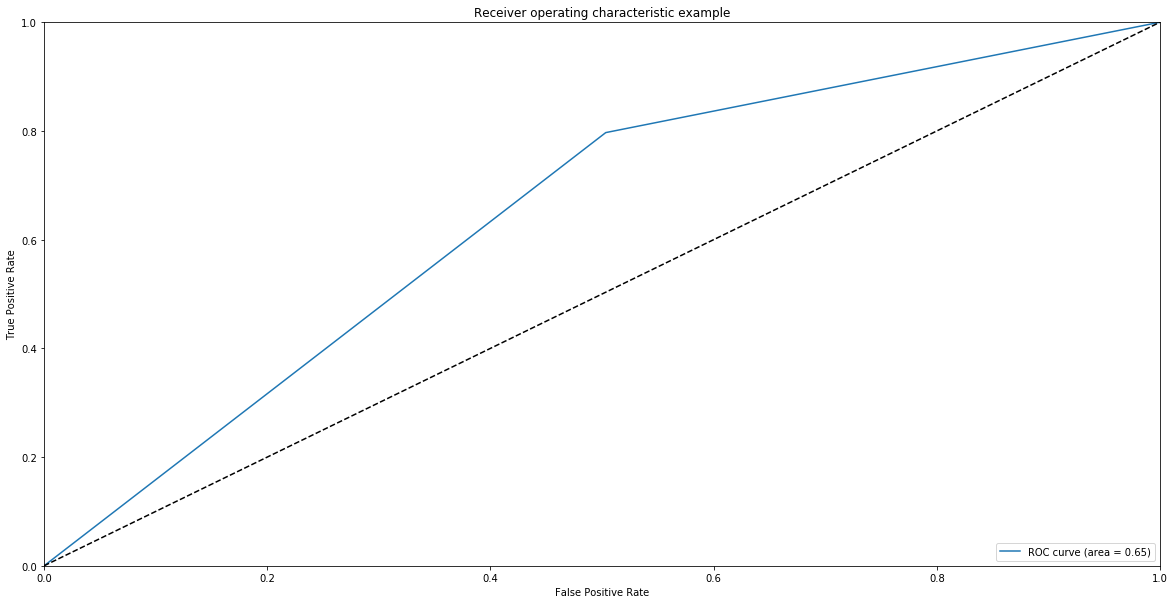

In [314]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % area)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [315]:
print("Talking about the quality of the predictions under the assumption that the data provided is a generalized dataset:\n")
print("-->We can see that the accuracy of the predictions made by the classifier is approx. 64.68% and thus the classifier is not very accurate in correctly classifying the genders.\n")
print("-->We can see that the error rate is approx. 35.31% which is pretty high and thus we cn say that the model is predicting wrong genders pretty often.\n")
print("-->We can see that the Recall or the True positive rate is approx. 79.69% whereas the True Negative rate or Specificity is approx. 49.67%. Looking at these values we can see that the model predicts gender 1 when the actual gender is 1 much more often that it predicts 0 when the actual gender is 0 which tells us that the model is more sensitive than specific\n")
print("-->We can also say that one of the possible scenarios for the model to be sensitive is that the model is not trained enough for gender 0 and we can also say that one of the possibilities could be having features with high correlation and favouring gender 1 during training because of which the model is predicting gender 1 better than gender 0\n")
print("-->When looking at the false positive rate which is approx. 50.32% we can say that the model is predicting a lot of gender 0's as gender 1 which gives us an insight that there is a possibility that the model has not trained enough on gender 0 representations which might happen due to bad features or less representation of gender 0 in the training dataset\n")
print("-->We can see that the actual gender 0 and actual gender 1 are equal that is 4407 but the predicted gender 1 is 5730 and the predicted gender 0 is 3084 which tells us that the model is not performing very well in predicting the genders accurately\n")
print("-->Since there is no majority class here and the representation of gender 0 and gender 1 are equal in our dataset and thus the null error rate is 50%\n")
print("-->We can see that the precision of the model is approx. 61.29% which is again not a very convincing value because even when the model is predicting the gender 1 it is not correct very often and thus the model is not very precise\n")
print("-->We can see that weighted average of precision and recall that is the F1 score is also not very high and is approx. 69.29%\n")
print("-->Analysing the ROC curve we can see that the model is not performing very well for the generalised dataset as the ROC curve is not going away from the line that performs by chance. The further the curve is from the line; the better model performs and in our case the model is not performing very well and thus is not predict the genders very accurately\n")
print("-----------------------------------------------------------------------------------------------------------\n")
print("OVERALL ANALYSIS\n")
print("**By looking at all the metrics above we can say that the overall performance of the model is not very accurate in predicting genders and some of the reasons for that could be the following:\n")
print("1.The features chosen for training could have high correlation and may be not representing both the genders accurately\n")
print("2.The training dataset may not have appropriate representations for the genders\n")
print("3.The number of features chosen may not be enough or may not adequately represent the genders in the training dataset.\n")
print("4.Better insights can be given about the model performance and how to improve the model performance in predciting genders if more information is provided about the training dataset and the features.This would also help me to comment more on bias and variance.\n")
print("5. Just for instance if the model performed good during training and on the training dataset but is performing bad for the generalised dataset we can say that the model is overfitting and has high variance because of which it is also capturing the noises in the dataset and is not general\n")
print("6. On the other hand if the model did not perform good during training on the training dataset and is performing bad on the generalised dataset as well, we can say that the model is underfitting and has a high bias\n")

Talking about the quality of the predictions under the assumption that the data provided is a generalized dataset:

-->We can see that the accuracy of the predictions made by the classifier is approx. 64.68% and thus the classifier is not very accurate in correctly classifying the genders.

-->We can see that the error rate is approx. 35.31% which is pretty high and thus we cn say that the model is predicting wrong genders pretty often.

-->We can see that the Recall or the True positive rate is approx. 79.69% whereas the True Negative rate or Specificity is approx. 49.67%. Looking at these values we can see that the model predicts gender 1 when the actual gender is 1 much more often that it predicts 0 when the actual gender is 0 which tells us that the model is more sensitive than specific

-->We can also say that one of the possible scenarios for the model to be sensitive is that the model is not trained enough for gender 0 and we can also say that one of the possibilities could be h

In [330]:
print("Answer for Part E\n")
print("---------------------------------------------------------------------------------------------------------------------")
print("In the last semester before starting my co-op i took a course on Information Retrieval and i was taking a course like that for the first time in my life, i did not even have any prior experience in that domain. The tools that made my life easier and solved my problem of becoming comfortable with something completely new coming my way were: BeautifulSoup, NLTK and Pickle. I was completely unaware about how am i going to crawl web pages in my first assignment and that is when i found about BeautifulSoup which made web crawling so much more easier. Further in this course i had to play around a lot with creating n-grams out of huge chunks of texts that was obtained after crawling thousands of web pages and that is when NLTK helped me a lot to tokenize these chunks according to my ease of convenience and the way i wanted. NLTK has helped me a lot previously for my NLP projects as well. Another such tool that i used for the first time ever was Pickle, i found out about this tool when i was really having a tough time dealing with such huge Information that was retrieved and i didn't know how to deal with it optimally, that is when Pickle came into picture and solved my problem in such an elegant way by converting my Python object into a character stream. At the end of this course i had ended up developing an Information Retrieval System of my own in a period of 4 months where i started with knowing absolutely nothing about the domain or the techniques and i also got an A in the course. These 3 tools together helped me solve a much bigger problem and thus are one of my favourites.")

Answer for Part E

---------------------------------------------------------------------------------------------------------------------
In the last semester before starting my co-op i took a course on Information Retrieval and i was taking a course like that for the first time in my life, i did not even have any prior experience in that domain. The tools that made my life easier and solved my problem of becoming comfortable with something completely new coming my way were: BeautifulSoup, NLTK and Pickle. I was completely unaware about how am i going to crawl web pages in my first assignment and that is when i found about BeautifulSoup which made web crawling so much more easier. Further in this course i had to play around a lot with creating n-grams out of huge chunks of texts that was obtained after crawling thousands of web pages and that is when NLTK helped me a lot to tokenize these chunks according to my ease of convenience and the way i wanted. NLTK has helped me a lot previousl